In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [55]:
data = pd.read_csv('./company_stock_prices/AMZN.csv')

In [56]:
def splits(data,train_ratio):
  train_length = int(len(data) * train_ratio)
  train_data = data[0:train_length]
  test_data = data[train_length+1:len(data)]
  return train_data,test_data

In [57]:
def linear_regression_past_Nvalues(data,N):
  
  y_pred=[]
#   print(data.shape)
  for i in range(N,len(data['Close'])):

    #model
    model=linear_model.LinearRegression(fit_intercept=True)
    
    #data of past N dys
    x_train=np.array(range(1,N+1)).reshape(-1,1)
    y_train=np.array(data['Close'][i-N:i])
    
    #model training and prediction
    model.fit(x_train,y_train)
    predicted=model.predict(np.array(N+1).reshape(1,-1))
    y_pred.append(predicted[0])
  return y_pred 

In [61]:
N=30
train_data,test_data =splits(data,0.7)
output=linear_regression_past_Nvalues(test_data,N)
test_data = test_data[['Date','Close']][N:]
test_data.reset_index(inplace = True, drop = True)
predictedValues = pd.DataFrame(output,columns=['PredictedClose'])
test_data['Predicted Values'] = predictedValues['PredictedClose']



In [62]:
# Getting arrays
test_array = test_data['Close'].to_numpy()
test_prediction_flattened = test_data['Predicted Values'].to_numpy()

df = pd.DataFrame({'Actual Values':test_array, 'Predicted Values':test_prediction_flattened})

Text(0,0.5,'Stock Price (in USD)')

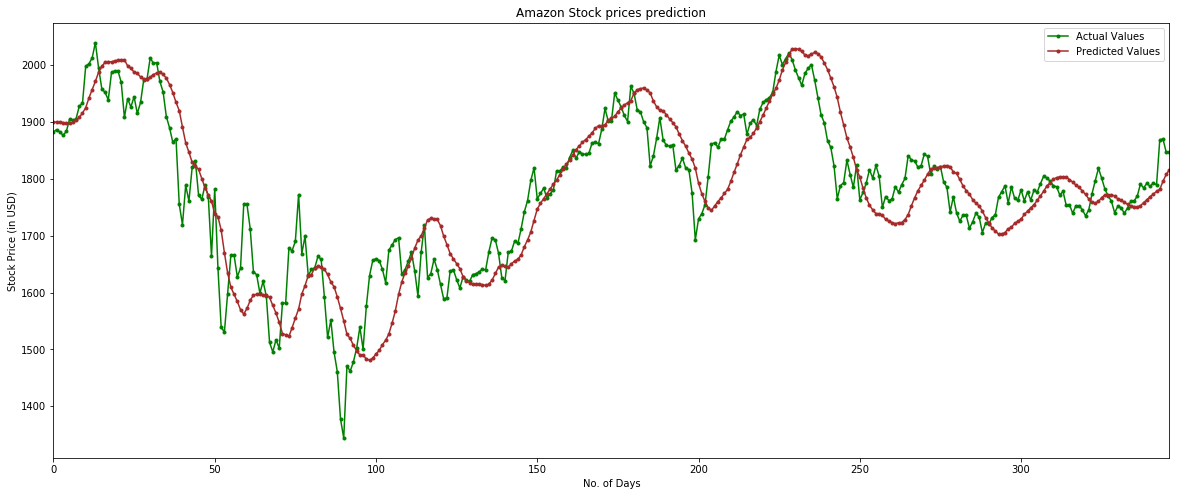

In [63]:
plot = df[['Actual Values', 'Predicted Values']].plot( marker='.',
                                                color=['green', 'brown'], 
                                                title="Amazon Stock prices prediction")
plot.set_xlabel("No. of Days")
plot.set_ylabel("Stock Price (in USD)")

In [65]:
print(len(test_array))

347
